# SVM - SUPORT VECTOR MACHINE

### Neste notebook você encontrará:

**Referências e DataSet**<br/>
**Introdução ao Algoritmo**<br/>
**Como Funciona:**<br/>
**- Classificação Binária**<br/>
**- Classificação Multiclasse**<br/>
**Prós e Contras do Modelo**<br/>
**Aplicando SVM - Prever se um câncer de mama é Benigno ou Maligno**<br/>
**Adicional: Como reaproveitar um modelo de machine learning criado?**

### Referências
https://scikit-learn.org/stable/modules/svm.html<br/>

https://www.geeksforgeeks.org/support-vector-machine-algorithm/<br/>

https://www.baeldung.com/cs/svm-multiclass-classification<br/>

### DataSet
https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Original)<br/>


### Introdução ao Algortimo

SVM, Suport Vector Machine, é um algoritmo de aprendizado supervisionado muito utilizado para classificação de dados em grupos diferentes, mas que também pode ser utilizado para regressão (prevendo um resultado numérico).

O objetivo do SVM é encontrar uma reta que melhor separe os grupos, caso sejam apenas duas características, ou encontrar um hiperplano, caso o problema possua várias características. Após o conhecimento desta reta/hiperplano ele consegue predizer a qual grupo determinado dado pertença apenas observando de qual de lado ele está.

O algoritmo tem capacidade de classicar os dados entre duas categorias ou mais. Chamamos de Classificação Binária e Classifcação Multiclasse, respectivamente.

### Como Funciona

#### Classificação Binária
Classificação Binária é a classificação entre duas clasess.

Entendemos que o SVM busca o melhor hiperplano que segregue os dados em classes, mas, de uma forma prática, como ele funciona?<br/>
Primeiro precisamos plotar as informações. Tomemos uma classificação que possua duas características (x, y) e observe as figuras abaixo.

Qual a melhor reta que classifique os grupos?
<br/>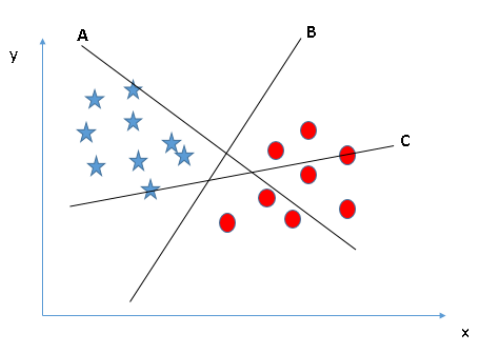<br/>
Fica fácil neste caso que a melhor reta é a **B**.

E agora, qual a melhor reta? Já que todas separaram bem os dois grupos...
<br/>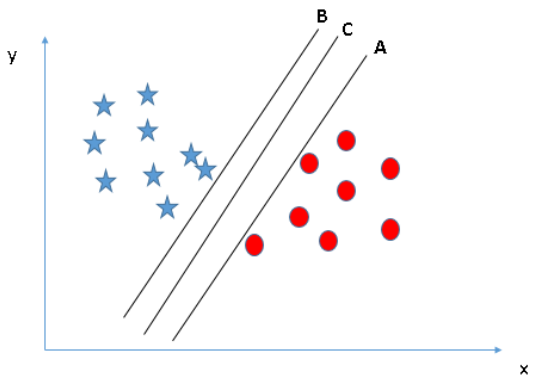<br/>
Neste caso escolhemos a reta cuja distância dela até o ponto de dados mais próximo de cada lado é maximizada.<br/>
Teremos então que a melhor reta é a **C**.

E neste caso então?
<br/>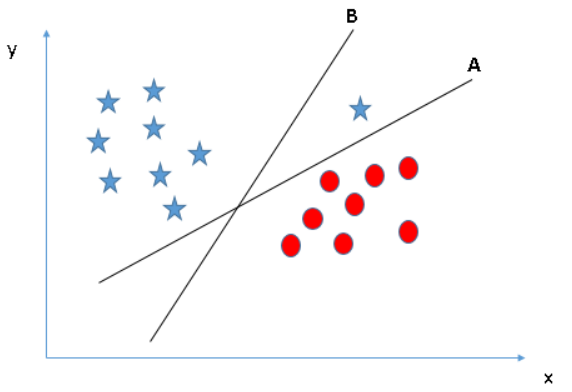<br/>
O algortimo segue uma ordem de prioridade, primeiro ele traça a reta que melhor separa os dois grupos para depois maximizar a distância entre os pontos.<br/>
Portanto a melhor reta é a **A**.

Mas e se tivermos outliers em nossos dados... Como encontraremos a  reta?
<br/>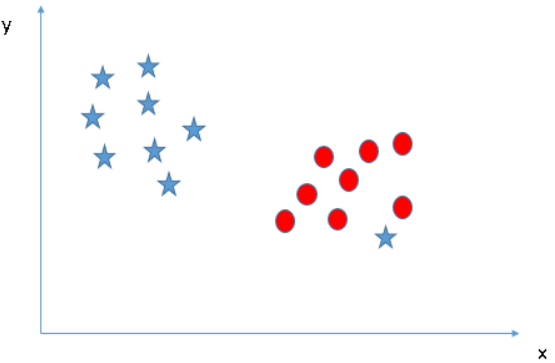<br/>
O SVM é extremamente robusto para outliers, possuindo recursos para identificar e ignorar estes tipos de  dados. Desta forma ele ainda encontraria a reta que maximizasse a margem da distância entre os pontos.

Mas até agora nosso dados são todos linearmente separáveis, e se não fossem?
<br/>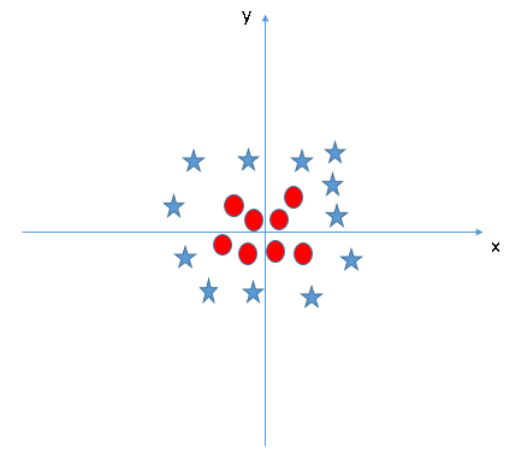<br/>

Existe um recurso adicional no algoritmo que utiliza um conjunto de funções matemáticas conhecidas como _Kernels_. Elas tratam as informações para rearranjar os dados de forma que eles possam ser separados lineramente. 
<br/>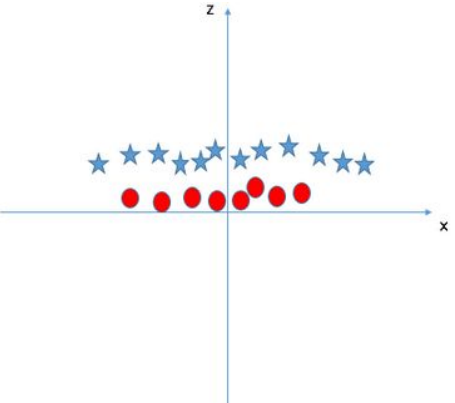<br/>

Neste caso então ele utilizou um truque de _Kernel_ onde rearranjou os dados não linares em y pra os dados lineares em z.

#### Classificação Multiclasse

Em seu tipo mais simples, o SVM não oferece suporte nativo à classificação multiclasse. Ele suporta apenas classificação binária. Para classificação multiclasse, o mesmo princípio é utilizado, pois divide-se o problema de multiclassificação em vários problemas de classificação binária, que podem ser **One vs One** ou **One vs All** (também chamada de _one vs rest_).

Na **Abordagem One vs One** , precisamos de um hiperplano para separar cada duas classes, desprezando os pontos da terceira classe. Isso significa que a separação leva em consideração apenas os pontos das duas classes na divisão atual.

Por exemplo, a linha vermelho-azul tenta maximizar a separação apenas entre os pontos azul e vermelho. Não tem nada a ver com pontos verdes:
<br/>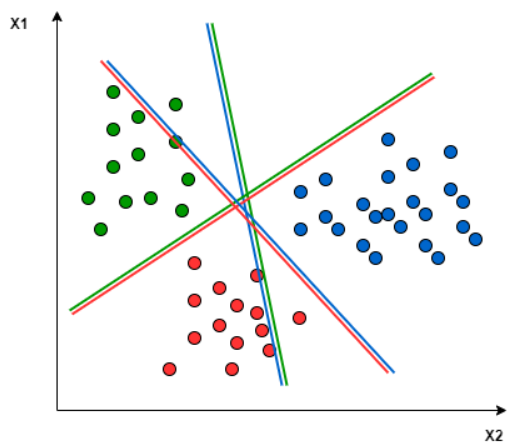<br/>
Sendo assim, o SVM analisa todas as combinações das classes e escolhe a mais "votada". Por exemplo: O SVM escolheu azul na combinação (azul vermelho), verde em (azul, verde) e verde em (vermelho, verde). Logo a classe escolhida será a vencedora verde com dois "votos".

Na **Abordagem One vs All** precisamos de um hiperplano para separar uma classe de todas as outras ao mesmo tempo. Isso significa que a separação leva em consideração todos os pontos, dividindo-os em dois grupos:<br/>
Um grupo para os pontos da classe;<br/>
Um grupo para todos os outros pontos.<br/>

Por exemplo, a linha verde tenta maximizar a separação entre os pontos verdes e todos os outros pontos de uma só vez.
<br/>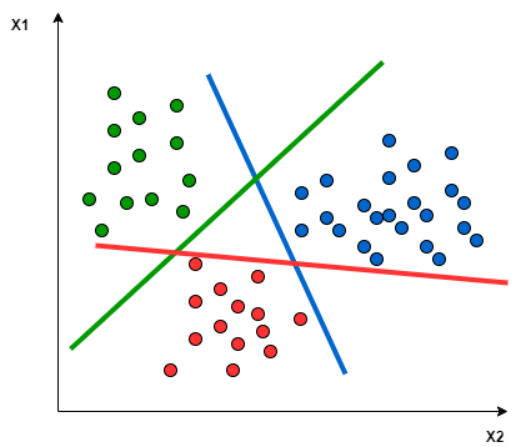<br/>
Novamente, como na abordagem anterior se o SVM escolhesse vermelho+verde em (azul, vermelho+verde), verde em (verde, azul+vermelho), e verde+azul em (vermelho, verde+azul) a classe vencedora seria a verde por aparecer mais vezes.

### Prós e Contras

**Prós**<br/>
- É garantido a convergir para o melhor hiperplano possível, encontrando a melhor solução para o problema
- Funciona bem com muitas dimensões (features)
- Consegue tratar outliers
- Fácil implementação
- Sua técnica minimiza o risco de overfitting

**Contras**<br/>
- Resultado é dificilmente interpretável pois não permite interpretação da estratégia de decisão
- Voltados apenas para atributos numéricos (necessidade de conversão para trabalhar com atributos discretos)


### Aplicando o SVM - Prever se um câncer de mama é Benigno ou Maligno

**Este banco de dados de câncer de mama foi obtido dos Hospitais da Universidade de Wisconsin, em Madison-USA.<br/>
Responsável: Dr. William H. Wolberg.**
   
Utilizando dados históricos sobre pacientes diagnosticados com câncer, podemos permitir que os médicos diferenciem casos malignos e benignos devido aos atributos independentes?

Teremos aqui um problema de classificação binária.

**Informação do dataset: em 'Class' temos que o código 2 é para Benigno e 4 é Maligno**

**Importar Bibliotecas**

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

**Importar DataSet**

In [2]:
df = pd.read_csv('breast_cancer_bd.csv', sep=',')

**Explorar DataSet**

In [3]:
#Visualizar o dataset
display(df.head())

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [4]:
#Como a coluna Sample code number traz apenas o ID do paciente vamos excluir do nosso modelo
df = df.drop('Sample code number', axis=1)

In [5]:
#Entendendo os dataset, qtd de linhas, colunas, dados faltantes, tipo dos dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Clump Thickness              699 non-null    int64 
 1   Uniformity of Cell Size      699 non-null    int64 
 2   Uniformity of Cell Shape     699 non-null    int64 
 3   Marginal Adhesion            699 non-null    int64 
 4   Single Epithelial Cell Size  699 non-null    int64 
 5   Bare Nuclei                  699 non-null    object
 6   Bland Chromatin              699 non-null    int64 
 7   Normal Nucleoli              699 non-null    int64 
 8   Mitoses                      699 non-null    int64 
 9   Class                        699 non-null    int64 
dtypes: int64(9), object(1)
memory usage: 54.7+ KB


In [6]:
#Acoluna Bare Nuclei está como Dtype object, vamos analisar seu valores
print(df['Bare Nuclei'].unique())

['1' '10' '2' '4' '3' '9' '7' '?' '5' '8' '6']


In [7]:
#Existe dados com valores '?' na coluna Bare Nuclei, vamos substituir por valores nulos
df = df.replace('?', np.nan)

#Transformar agora a coluna Bare Nuclei de object para int
df['Bare Nuclei'] = pd.to_numeric(df['Bare Nuclei'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Clump Thickness              699 non-null    int64  
 1   Uniformity of Cell Size      699 non-null    int64  
 2   Uniformity of Cell Shape     699 non-null    int64  
 3   Marginal Adhesion            699 non-null    int64  
 4   Single Epithelial Cell Size  699 non-null    int64  
 5   Bare Nuclei                  683 non-null    float64
 6   Bland Chromatin              699 non-null    int64  
 7   Normal Nucleoli              699 non-null    int64  
 8   Mitoses                      699 non-null    int64  
 9   Class                        699 non-null    int64  
dtypes: float64(1), int64(9)
memory usage: 54.7 KB


In [8]:
#Vamos completar os 16 dados nulos em Bare Nuclei com a mediana destes dados
df['Bare Nuclei'] = df['Bare Nuclei'].fillna(df['Bare Nuclei'].median())

In [9]:
#Verificando os dados estatístico do dataset agora tratado
display(df.describe().transpose())

,count,mean,std,min,25%,50%,75%,max
Clump Thickness,699.0,4.417740,2.815741,1.0,2.0,4.0,6.0,10.0
Uniformity of Cell Size,699.0,3.134478,3.051459,1.0,1.0,1.0,5.0,10.0
Uniformity of Cell Shape,699.0,3.207439,2.971913,1.0,1.0,1.0,5.0,10.0
Marginal Adhesion,699.0,2.806867,2.855379,1.0,1.0,1.0,4.0,10.0
Single Epithelial Cell Size,699.0,3.216023,2.214300,1.0,2.0,2.0,4.0,10.0
Bare Nuclei,699.0,3.486409,3.621929,1.0,1.0,1.0,5.0,10.0
Bland Chromatin,699.0,3.437768,2.438364,1.0,2.0,3.0,5.0,10.0
Normal Nucleoli,699.0,2.866953,3.053634,1.0,1.0,1.0,4.0,10.0
Mitoses,699.0,1.589413,1.715078,1.0,1.0,1.0,1.0,10.0
Class,699.0,2.689557,0.951273,2.0,2.0,2.0,4.0,4.0



Pacientes com câncer Benigno: 458
Paciente com câncer Maligno: 241


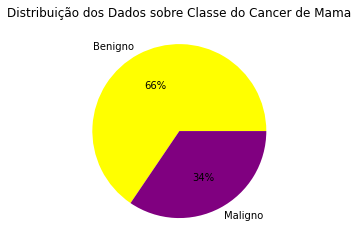

In [10]:
#Checar o balanceamento dos dados
#Verificar no dataset quantos dados são benignos e quantos são malignos
#Pelo dicionário do dataset temos que na coluna 'Class' os dados do tipo:
#2=benigno e 4=maligno
cancer_benigno = len(df[df['Class'] == 2])
cancer_maligno = len(df[df['Class'] == 4])

#Exibir gráfico
print('\nPacientes com câncer Benigno: {}\nPaciente com câncer Maligno: {}'.format(cancer_benigno, cancer_maligno))
plt.pie([cancer_benigno, cancer_maligno], labels=['Benigno', 'Maligno'], autopct='%1.0f%%', colors=['yellow', 'purple'])
plt.title('Distribuição dos Dados sobre Classe do Cancer de Mama')
plt.show()

**Separar os Dados**

Separar os dados em x e y, sendo:

y é o resultado, ou seja, a característica a ser classificada. Variável dependente. No nosso caso queremos classificar em benigno/maligno e esta informação está presente na coluna Class, sendo esta nosso y.<br/>
x são as características dos dados que possibilitam encontrar o y. Variável independente.
No nosso caso o x serão todas a colunas exceto a Class.

In [11]:
y = df['Class']
x = df.drop('Class', axis=1)

Agora, iremos separar nossos dados para treino e para teste.

In [12]:
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.2, random_state=10)
#test_size para definir o ponto em que os dados serão particionados
#random_state para para que a chamada da função seja replicável. Caso não seja informado os dados serão sempre diferentes

**Criar Modelo SVM**

Dentro da biblioteca do SVM no scikit-learn temos três classificações deste modelo que são capazes de realizar classificação binária e multiclasse em um conjunto de dados:
- SVC
- NuSVC
- LinearSVC <br/>

SVC e NuSVC são métodos semelhantes, mas aceitam conjuntos de parâmetros ligeiramente diferentes e têm diferentes formulações matemáticas. Por outro lado, LinearSVC é outra implementação (mais rápida) do Support Vector Classification para o caso de um kernel linear. Observe que LinearSVC não aceita parâmetro kernel, pois supõe-se que seja linear.

Para ilustrar mostraremos abaixo como o algoritmo recebe os dados dos pacientes. Criaremos todos as combinação das características para ilustrar em 2 dimensões, porém, na realidade toma-se um ambiente com mais dimensões.

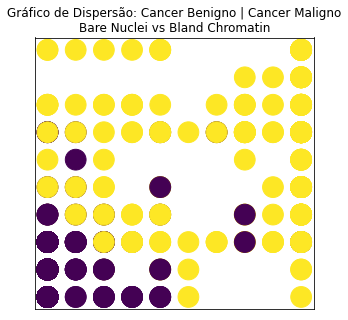

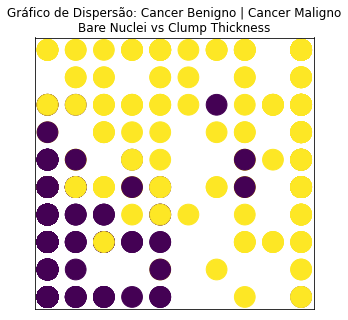

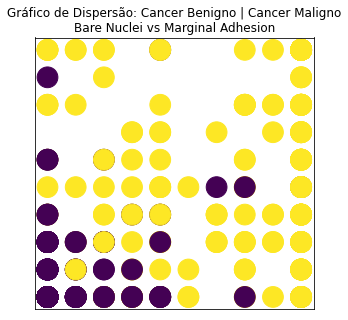

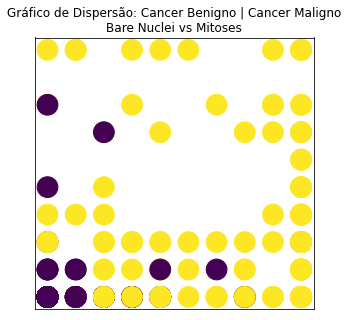

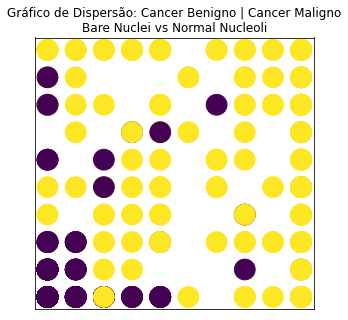

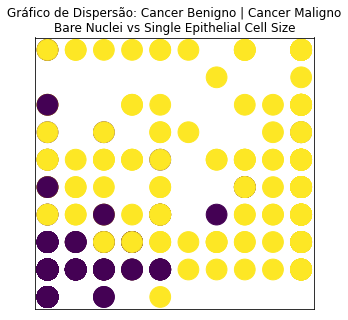

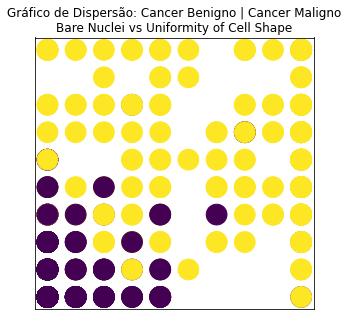

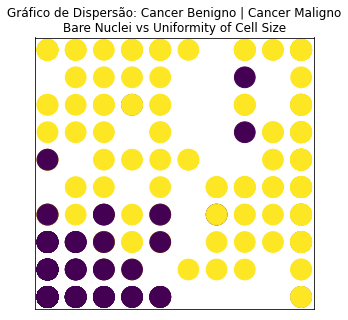

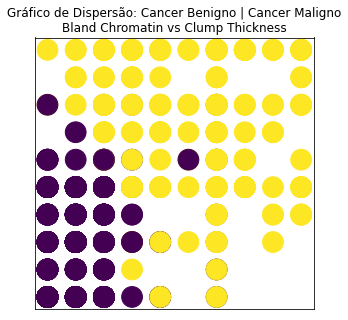

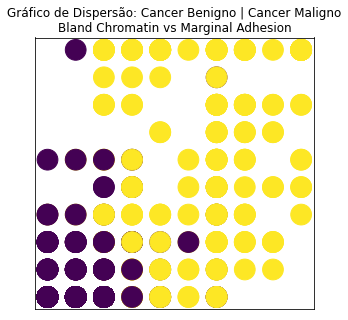

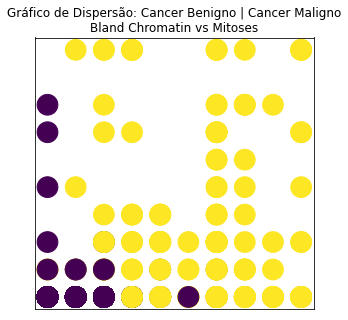

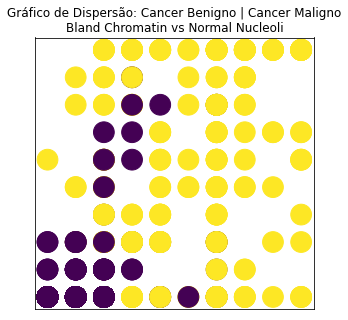

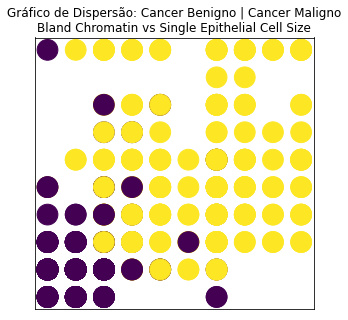

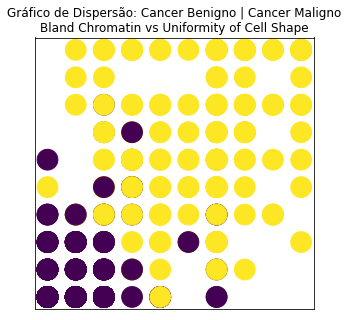

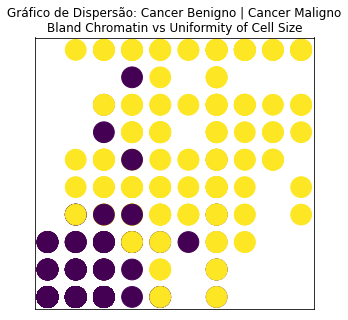

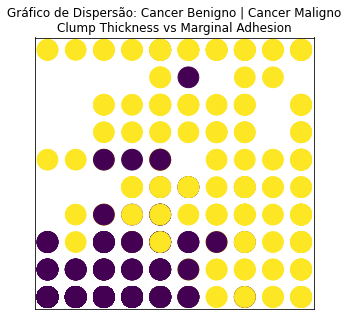

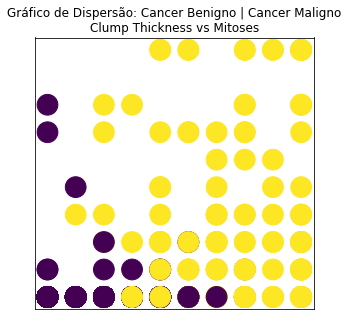

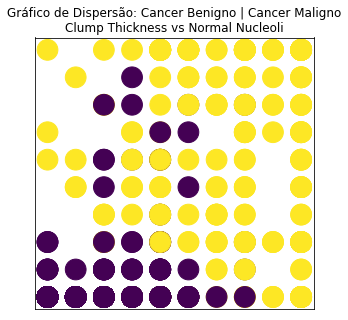

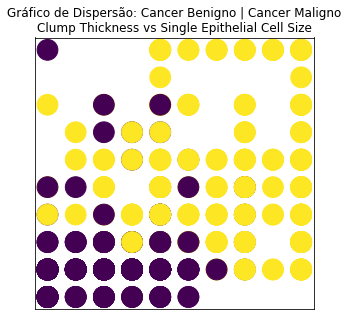

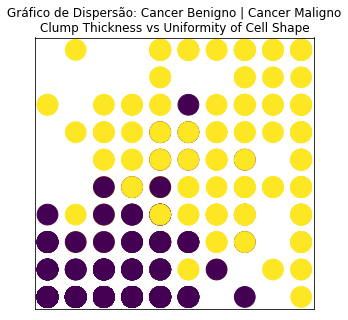

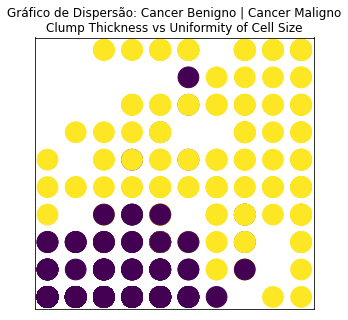

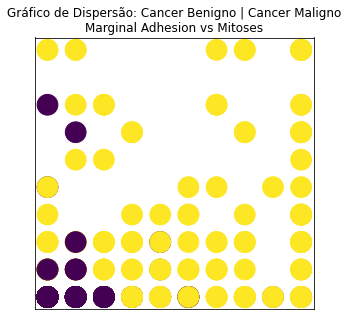

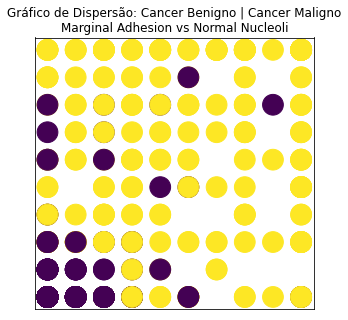

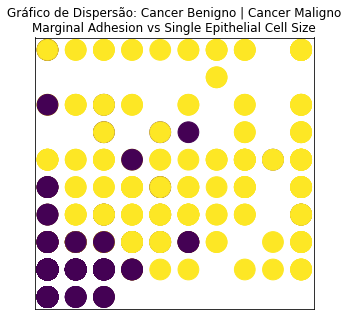

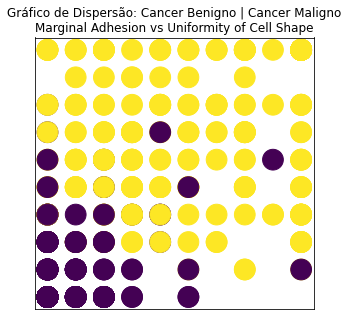

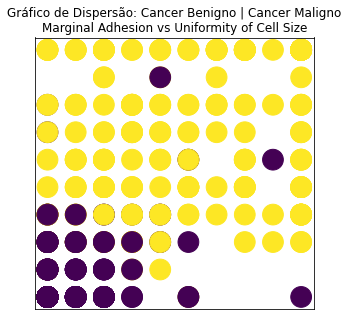

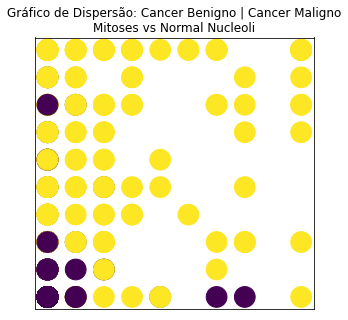

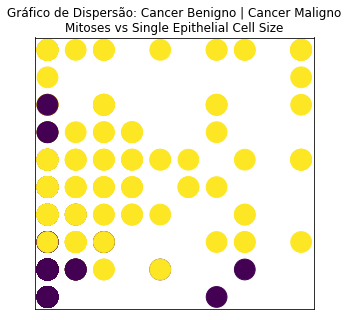

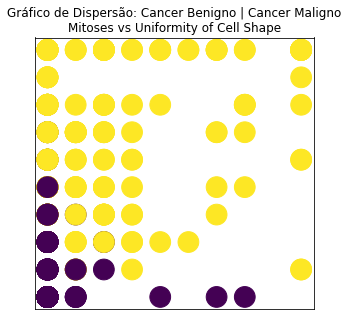

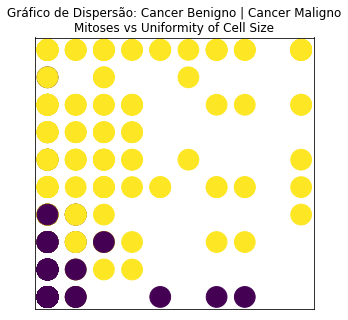

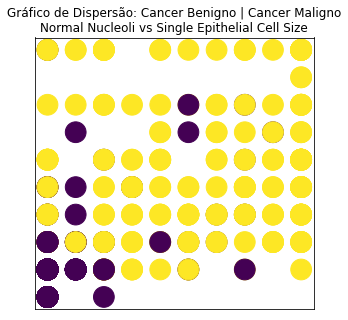

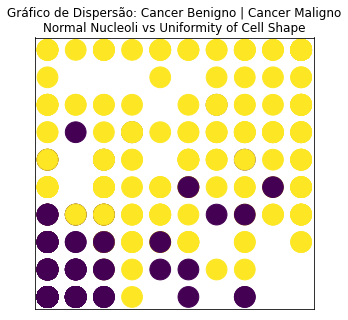

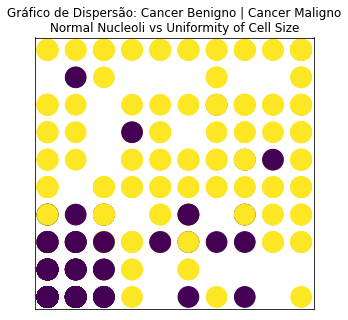

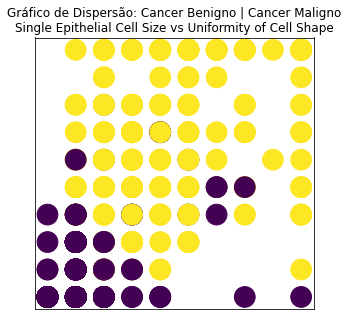

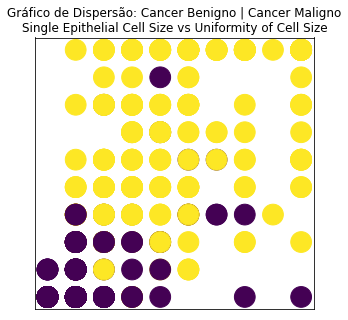

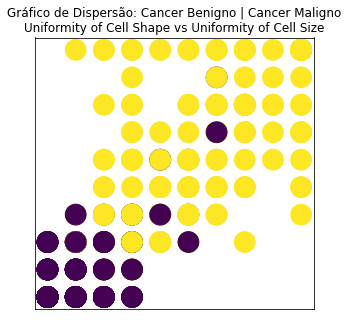

In [13]:
#Criar uma lista com a combinção de todas as características do modelo
col_combinadas = []

for i, coluna1 in enumerate(x.columns):
    for j, coluna2 in enumerate(x.columns):
        if coluna1 == coluna2:
            pass
        else:
            list = [coluna1, coluna2]
            list.sort()
            col_combinadas.append(list)
            col_combinadas.sort()

#Excluir as combinações duplicadas
col_combinadas = col_combinadas[::2]

#Exibir gráfico de todas as analises da abordagem one vs one
for par in col_combinadas:
    plt.figure(figsize=(5,5))
    plt.scatter(df[par[0]], df[par[1]], c=y, s=430)
    plt.title(f'Gráfico de Dispersão: Cancer Benigno | Cancer Maligno\n{par[0]} vs {par[1]}')
    plt.xticks([])
    plt.yticks([])
    plt.show()

In [14]:
#Criar o modelo
classificar_cancer = svm.SVC(C= .1, kernel='linear', gamma= 1)

#Treinar o modelo
classificar_cancer.fit(x_treino, y_treino)

#Testar o modelo
y_pred = classificar_cancer.predict(x_teste)

**Avaliar Modelo**

**Score**:<br/>
Resumidamente, a função modelo.score(X_train, Y_train) irá verificar o número que seu modelo previu e irá comparar com o valor esperado do conjunto de treino. Podemos aplicar essa mesma função no nosso conjunto de teste, com dados que o modelo nunca viu na vida, modelo.score(X_test, Y_test). Desse jeito, o modelo irá comparar o valor que ele previu com o valor que era esperado no conjunto de teste.<br/>
Como resultado dessa função, você deverá receber um número que vai de 0.0 a 1.0, onde quanto mais próximo de 1.0, melhor. Mas, não se esqueça que é muito importante que seu modelo não tenha um score absurdamente alto no conjunto de treino, enquanto no de teste ele está bem baixo. Quando isso acontece, você está enfrentando um problema de overfitting, que é quando o modelo prevê muito bem os dados que foram usados para treiná-lo, mas ele não consegue se sair muito bem com dados que nunca viu. Há também os casos de underfitting, onde seu modelo não consegue entender a tendência dos dados.

In [15]:
#Avaliação do Score
print('Precisão média nos dados de treino: {:1.2%}'.format(classificar_cancer.score(x_treino, y_treino)))
print('Precisão média nos dados de teste: {:1.2%}'.format(classificar_cancer.score(x_teste, y_teste)))

Precisão média nos dados de treino: 97.50%
Precisão média nos dados de teste: 96.43%


Tanto para os dados de teste quanto para os dados de treino obtivemos resultados satisfatórios.<br/>
Podemos observar também que não houve um descolamento grande entre o resultado de teste e de treino, minimizando assim o risco de overfitting/underfitting.

**Matriz de confusão:**<br/>
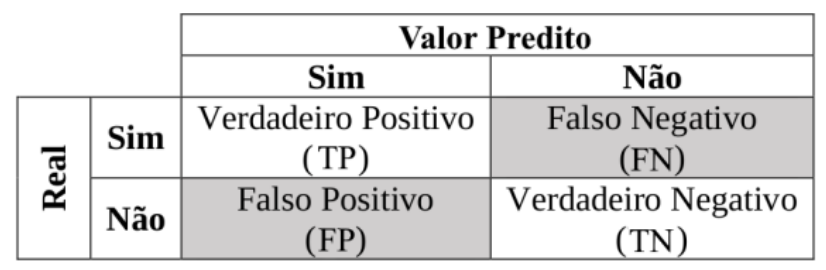

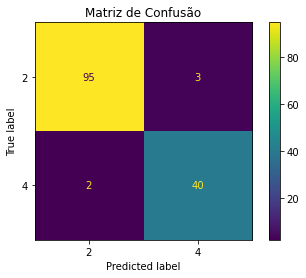

In [16]:
#Criar matriz de confusão
matriz_confusao = confusion_matrix(y_teste, y_pred)
#Exibir gráfico matriz de confusão
grafico = ConfusionMatrixDisplay(matriz_confusao, display_labels=classificar_cancer.classes_)
grafico.plot()
plt.title('Matriz de Confusão')
plt.show()

Pelo resultado da matriz temos que dos 140 casos analisados:
- O modelo acertou 95 vezes os casos que eram câncer benignos(2)
- 3 vezes o câncer era benigno(2) e ele disse ser maligno(4)
- O modelo acertou 40 vezes os casos que eram câncer malignos(4)
- 2 vezes o câncer era maligno(4) e ele disse ser benigno(2)

In [17]:
#Exibir o relatório de classificação
print('\nRelatório de classificação: \n\n', classification_report(y_teste, y_pred))  

#Calcular a acuracidade do modelo
acuracidade = accuracy_score(y_teste, y_pred)
print('\nAcurácia do modelo: {:1.0%}'.format(acuracidade))


Relatório de classificação: 

               precision    recall  f1-score   support

           2       0.98      0.97      0.97        98
           4       0.93      0.95      0.94        42

    accuracy                           0.96       140
   macro avg       0.95      0.96      0.96       140
weighted avg       0.96      0.96      0.96       140


Acurácia do modelo: 96%


**Conclusão**

Com as avalições feitas vimos que o nosso modelo apresentou bom resultado, com acuracidade (precisão geral) de 96%, sendo um excelente resultado. Fica um ponto de atenção quanto ao resultado dos falsos positivos: 2 vezes o modelo indiciou que o câncer era benigno sendo ele maligno, correspondendo a quase 5% (40/42) de erro. Pelo contexto do problema entende-se este ser o erro mais grave, visto que poderia atrasar o início de um tratamento onde o diagnóstico precoce é de suma importância na cura.

**Adicional: Como reaproveitar um modelo de machine learning criado?**

Após o nosso modelo criado e treinado podemos utilizá-lo para fazer novas previsões!

In [18]:
#Modelo criado e treinado
classificar_cancer

#Características do novo paciente
#Deve estar no mesmo padrão do modelo treinado e testado
#No caso deve estar no mesmo padrão de x_treino ou x_teste
display(x_treino.head(1))
#Ou seja, deve ser uma lista de listas onde a característa deve estar na mesma ordem destas colunas

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses
181,1,1,1,1,2,1.0,1,1,1


In [19]:
#Para exemplificar o nosso novo paciente pegarei as características de um paciente qualquer dos nossos dados de teste
#Pegarei dos dados de teste pelo motivo do modelo não conhecer esses dados
i = 5
novo_paciente = x_teste[x_teste.index == x_teste.index[i]]

#Ou então inventamos um novo paciente
#novo_paciente = [[1,6,5,2,4,10,7,4,3]]

#Class do novo_pacinete retirado da base de teste
cancer_novo_paciente = y_teste[y_teste.index == x_teste.index[i]].values
print(f'\nPara comparação do resultado, já sabemos que nosso novo_paciente possui um cancer do tipo {cancer_novo_paciente}.\n')


Para comparação do resultado, já sabemos que nosso novo_paciente possui um cancer do tipo [4].



In [20]:
#Fazer o modelo prever a classe partindo das carcaterísticas do novo_pacinete
classificacao_novo_paciente = classificar_cancer.predict(novo_paciente)

In [21]:
#Checar resultado previsto
print(f'Segundo o modelo, o novo_paciente possui um cancer do tipo {classificacao_novo_paciente[0]}!')
try:
    if cancer_novo_paciente[0] == classificacao_novo_paciente[0]:
        print('O modelo acertou a previsão.')
    else:
        print('O modelo errou a previsão.')
except:
    pass

Segundo o modelo, o novo_paciente possui um cancer do tipo 4!
O modelo acertou a previsão.
